# Metoda Alokasi Portfolio Moderen: CPPI - Constant Proportion Portfolio Insurance

Krisis pasar yang terjadi beberapa tahun terakhir telah menyoroti manfaat dari strategi pengendalian risiko yang memungkinkan investor mendapatkan perlindungan risiko penurunan (*downside risk*). Studi ini menjelaskan jenis strategi asuransi risiko, dimulai dengan strategi dasar Constant Proportion Portofolio Insurance (CPPI), dan beralih ke strategi yang lebih canggih yang bertujuan mencapai potensi kenaikan tertinggi yang mungkin sambil memberikan batasan ketat untuk penurunan portofolio.


## Keterbatasan dari Diversifikasi dan Lindung Nilai (*Hedging*)

Sebelum mengenal CPPI, mungkin Anda sudah mendengar strategi lain yang digunakan untuk melindungi dari resiko penurunan, yaitu diversifikasi dan lindung nilai (*hedging*).

[Diversifikasi](https://www.investopedia.com/terms/d/diversification.asp) adalah strategi manajemen risiko yang menggabungkan berbagai macam investasi dalam suatu portofolio, guna memimimalkan resiko di suatu aset yang spesifik, atau yang disebut ***specific risk***, atau ***idiosyncratic risk***, atau ***unsystematic risk***.

Diversifikasi bekerja dengan baik di kondisi pasar yang rata-rata. Namun justru ketika kondisi pasar yang ekstrim, diversifikasi biasanya tidak bisa melindungi kita. Karena ketika pasar sedang turun secara ekstrim, biasanya semua investasi akan turun secara ekstrim juga, sehingga diversifikasi tidak efektif. Hal ini bisa dibuktikan, bahwa ketika market turun, korelasi antar aset meningkat (=semua turun). Resiko seperti ini disebut ***systematic risk***. Diversifikasi tidak bisa melindungi portfolio dari *systematic risk*.

Lindung nilai, atau [***hedging***](https://www.investopedia.com/terms/h/hedge.asp), adalah strategi untuk meminimalkan penurunan pada portfolio dengan cara memasukkan investasi yang bisa menetralisir penurunan pada aset yang hendak dilindungi tersebut. Misalkan portfolio kita mengandung aset A yang beresiko turun kalau harga minyak turun. Maka untuk melindungi portoflio akibat resiko penurunan harga minyak ini, kita masukkan aset yang justru akan naik ketika harga minyak turun.

Kelemahan dari *hedging* adalah dibutuhkan investasi yang besar, terutama kalau kita ingin mendapatkan perlindungan seratus persen dari semua kemungkinan penurunan (atau disebut *perfect hedge*). Juga karena sudah "dinetralisir", maka *hedging* juga mencegah portfolio mendapatkan keuntungan ketika kondisi aset-aset sedang naik, karena sesuai dengan prinsip *hedging*, akan ada aset yang lain yang turun.

Oleh karena itu *hedging* lebih cocok dipakai oleh investor-investor kaya, dengan tujuan lebih untuk melindungi aset-asetnya dari penurunan dari pada mencari keuntungan atas aset-aset tersebut.

Alternatif untuk mengatasi mahalnya *hedging* adalah dengan mengalokasikan portfolio secara dinamis, salah satunya dengan metoda *insurance* berikut.

## Constant Proportion Portfolio Insurance (CPPI)

[Constant Proportion Portfolio Insurance (CPPI)](https://www.investopedia.com/terms/c/cppi.asp) adalah jenis asuransi terhadap portofolio di mana investor menentukan batas bawah/nilai dasar (*floor*) yang dia bisa hadapi, kemudian menyusun alokasi aset beresiko dan konservatif berdasarkan prosentase tertentu yang tergantung pada nilai "bantalan" (*cushion*), didefinisikan sebagai nilai portofolio saat ini dikurangi nilai dasar, dan koefisien pengganda **`M`**. Definisinya mungkin agak sulit dimengerti, akan lebih jelas kalau Anda ikuti algoritmanya di bawah.

Constant Portofolio Proporsi Asuransi (CPPI) memungkinkan investor untuk mempertahankan eksposur terhadap potensi naik dari aset berisiko sambil memberikan suatu proteksi terhadap risiko penurunan. Hasil dari strategi CPPI agak mirip dengan membeli *call option* tanpa menggunakan kontrak *option*. Jadi, CPPI kadang-kadang disebut sebagai strategi *"convex"* (cembung), sebagai lawan dari "strategi *concave*" (cekung) seperti campuran konstan. 

Salah satu strategi CPPI misalnya *Principal Protection Strategy*, yaitu dengan menerapkan batas bawah sebesar nilai modal awal. Portfolio yang menjanjikan pengembalian paling sedikit sama dengan jumlah awal investasi, tapi juga memungkinkan *return* yang lebih besar dari *risk free rate* dengan menginvestasikan jumlah tertentu di aset beresiko.

Banyak lembaga keuangan menjual produk-produk CPPI pada berbagai aset berisiko, termasuk ekuitas dan *credit default swap* (CDS).

## Garis Besar Algoritma Implementasi CPPI

Pertama tentukan modal awal, batas minimum portfolio, dan berapa nilai koefisien pengganda (`m`).

```python
# Modal awal katakanlah 1000 USD
start_value = 1000

# Nilai batas minimum (misalnya 80% dari modal)
floor_value = 0.8 * start_value

# Pengganda
m = 3

# Lalu kita hitung nilai awal portfolio
account_value = 1000
```

Kemudian untuk setiap periode di mana penyesuaian harus dilakukan (misalnya tiap bulan, atau tiap kuartal), kita lakukan perhitungan berikut:

```python

setiap periode t:
    # Hitung cushion, secara persentase. account_value mencerminkan nilai
    # dari portfolio sekarang
    cushion = (account_value - floor_value)/account_value

    # Lalu kita hitung bobot untuk risky dan safe asset
    risky_w = m*cushion
    safe_w = 1-risky_w

    # Tentukan berapa nilai alokasi untuk keduanya
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    
    # Pada titik ini, lalukan penyesuaian/rebalancing pada portfolio berdasarkan
    # alokasi di atas
    rebalance()    
```

## Implementasi dan Demo Dasar-Dasar CPPI

Berikut adalah kode lengkap untuk demonstrasi CPPI. Kode dan data saya ambil dari sesi lab kursus [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python) minggu ketiga.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os

if not os.path.exists('edhec_risk_kit.py'):
    course_dir = '../../../courses/introduction to portfolio construction with python/nb'
    os.chdir(course_dir)

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

# Load the industry returns and the total market index we previously created
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
# Assume the safe asset is paying 3% per year
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.values[:] = 0.03/12 # fast way to set all values to a number
start = 1000 # start at $1000
floor = 0.80 # set the floor to 80 percent of the starting value

# set up the CPPI parameters
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
## set up some DataFrames for saving intermediate values
account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    # recompute the new account value at the end of this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the histories for analysis and plotting
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()


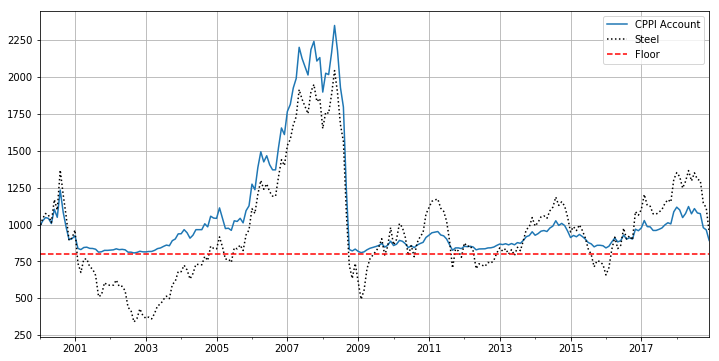

In [16]:
ind = "Steel"
ax = account_history[ind].plot(label='CPPI Account', figsize=(12,6))
risky_wealth[ind].plot(style="k:", label=ind)
ax.axhline(y=floor_value, color='r', linestyle='--', label='Floor')
ax.grid()
ax.legend()

Dari grafik di atas kita bisa mengamati dua hal (dari segi perlindungan atas penurunan nilai)

Di periode 2001-2003, kita bisa melihat bagaimana teknik ini secara efektif dan mulus melindungi portfolio dari kejatuhan pada aset beresiko. Di lain pihak, di tahun 2008 kita juga melihat bagaimana teknik ini gagal melindungi dari kejatuhan nilai portfolio sampai lebih dari 60%. 

Hal ini dikarenakan teknik dasar CPPI menerapkan nilai dasar (*floor*) yang tetap (dalam hal ini 80% dari nilai awal). Selama nilai portfolio berada di atas ini, maka proteksi tidak diberlakukan.

Untuk memperbaiki ini, kita bisa tambahkan proteksi drawdown di algoritma CPPI kita.

## Implementasi dan Demo CPPI dengan Proteksi *Drawdown*

Sebagian besar kodenya sama dengan di atas, hanya kita tambahkan sedikit kode proteksi *drawdown* di dalam iterasi.

In [20]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
# Assume the safe asset is paying 3% per year
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.values[:] = 0.03/12 # fast way to set all values to a number
start = 1000 # start at $1000
floor = 0.80 # set the floor to 80 percent of the starting value

# set up the CPPI parameters
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
## set up some DataFrames for saving intermediate values
account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)

peak = account_value
drawdown = 0.25

for step in range(n_steps):
    if drawdown is not None:
        peak = np.maximum(peak, account_value)
        floor_value = peak*(1-drawdown)
    
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    # recompute the new account value at the end of this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the histories for analysis and plotting
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()


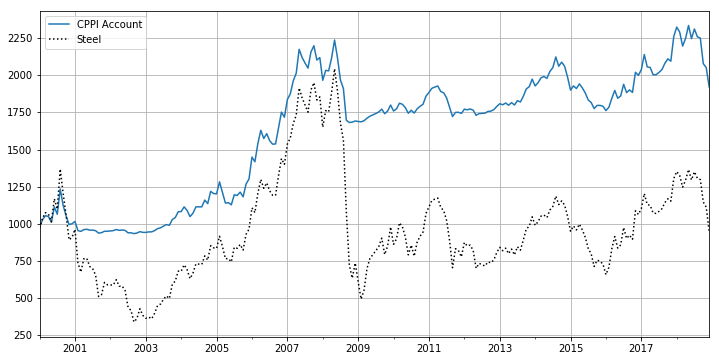

In [21]:
ind = "Steel"
ax = account_history[ind].plot(label='CPPI Account', figsize=(12,6))
risky_wealth[ind].plot(style="k:", label=ind)
ax.grid()
ax.legend()

Seperti kita lihat di atas, proteksi *drawdown*-nya bekerja (misalnya lihat di akhir tahun 2000 dan akhir 2008).

Namun demikian, fenomena lain dari CPPI adalah dia tidak bisa menangkap semua potensi kenaikan pada aset beresikonya, sehingga ketika terdapat tren kenaikan pada aset beresiko, maka CPPI akan menghasilkan keuntungan yang lebih rendah. Hal ini dikarenakan ketika trend kenaikan terjadi, CPPI mengalokasikan aset beresiko secara gradual sehingga kehilangan momentum awal-awal kenaikan. Sebagai contoh bisa dilihat di grafik di bawah ini.

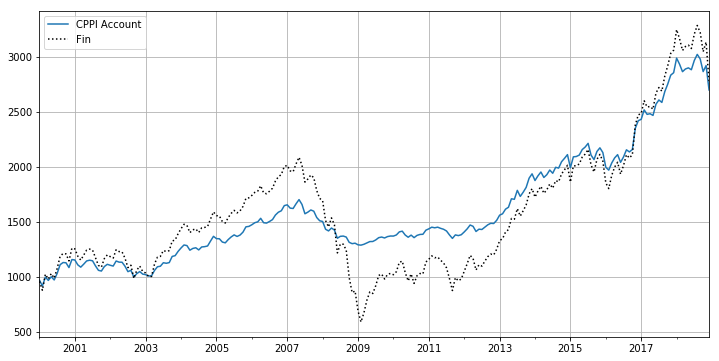

In [22]:
ind = "Fin"
ax = account_history[ind].plot(label='CPPI Account', figsize=(12,6))
risky_wealth[ind].plot(style="k:", label=ind)
ax.grid()
ax.legend()

## Panduan Koefisien Pengganda (`m`) Dinamis

Nilai koefisien pengganda `m` menentukan seberapa agresif portfolio dalam mengalokasikan investasi ke aset beresiko. Keagresifan ini mempengaruhi dua hal, yaitu *return* portfolio ketika ada trend naik pada aset beresiko, dan resiko penurunan nilai portfolio di bawah batas dasar (*floor*) ketika ada kejatuhan harga pada aset beresiko.

Nilai `m` yang tinggi, katakanlah di atas 3, membuat portfolio mengalokasikan porsi besar pada aset beresiko pada saat penyesuaian alokasi. Akibatnya, ketika ada trend naik pada aset beresiko, maka portfolio akan menikmati sebagian besar kenaikan ini. Tapi ketika aset beresiko jatuh, maka nilai portfolio juga jatuh juga, dan mungkin jatuhnya bisa melebihi batas dasar (*floor*) yang telah ditentukan. Ingat bahwa penyesuaian alokasi tidak dilakukan setiap saat, tapi tiap periode tertentu, misalnya tiap kuartal (untuk mengurangi ongkos *trading*). Jadi ada kemungkinan nilai portfolio melanggar batas dasarnya, ketika aset beresiko jatuh sebelum kita sempat melakukan penyesuaian, dan jika nilai `m` terlalu agresif.

Sebaliknya, nilai `m` yang rendah, misalnya `m`=1 artinya portfolio hanya mengalokasikan ke aset beresiko sebanyak bantalan (*cushion*) pada setiap proses penyesuaian alokasi, bisa melindungi portfolio dari kejatuhan yang lebih rendah nilai dasar, tapi akibatnya ketika aset beresiko sedang trend naik, portfolio juga lamban dalam mengikuti trend naik ini, sehingga *return* akhirnya lebih rendah.

## Referensi dan Atribusi

Sebegian besar materi termasuk kode didapat dari kursus [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python) minggu ketiga.